In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Fraud_Analysis_Dataset.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [5]:
print(df.info())  # No need for print()
print("=" * 100)
print(f"Dataset Shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None
Dataset Shape: (11142, 10)


In [6]:
print("Missing Values in Each Column:\n", df.isnull().sum())
print("=" * 100)
print(f"Unique Values in Dataset:\n{df.nunique()}")  # Fixed f-string syntax

Missing Values in Each Column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
Unique Values in Dataset:
step                 95
type                  5
amount            10565
nameOrig          11142
oldbalanceOrg      7806
newbalanceOrig     5914
nameDest           7508
oldbalanceDest     4531
newbalanceDest     2030
isFraud               2
dtype: int64


EDA - Univariate Analysis.

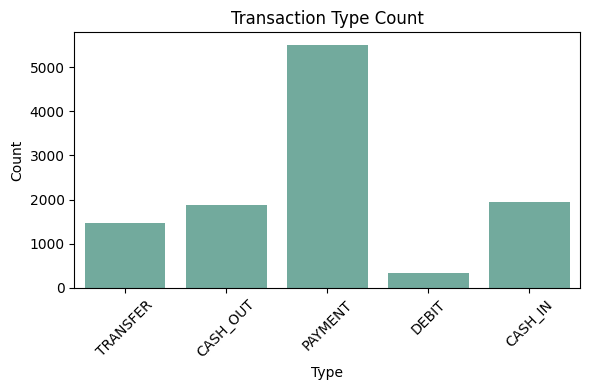

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', color='#69b3a2')  # ✅ custom color

plt.title('Transaction Type Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show the plot
plt.savefig("images/transaction_type_count.png", dpi=300)
plt.show()
plt.close()

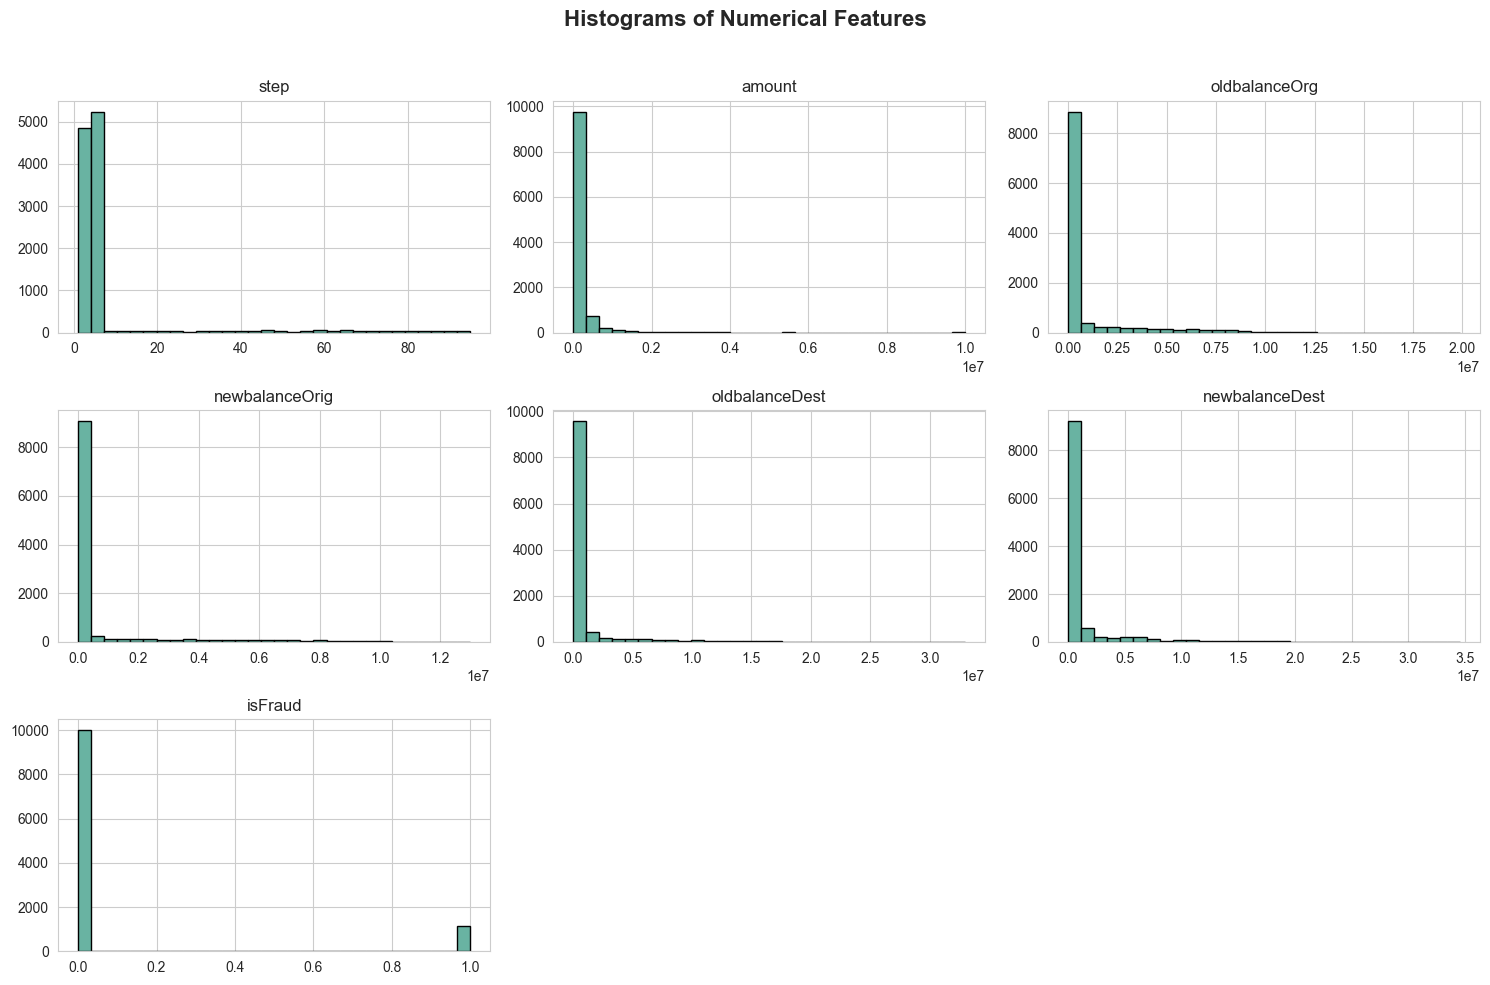

In [8]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Set plot style
sns.set_style("whitegrid")

# Plot
df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black', color='#69b3a2')
plt.suptitle('Histograms of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for title

# Save and show the plot
plt.savefig("images/numerical_features_hist.png", dpi=300)
plt.show()
plt.close()

**Observation:-** 
The distribution of transaction types is highly imbalanced, with certain types like PAYMENT and CASH_IN occurring much more frequently than others.

The numerical features (such as amount, oldbalanceOrg, newbalanceOrig, etc.) are not normally distributed and contain significant outliers.

These outliers are expected, as they represent real transaction amounts and balances — which can vary widely.

Therefore, imputation or aggressive outlier removal is not appropriate, as it may distort the underlying transaction patterns essential for fraud detection.

Bivariate Analysis

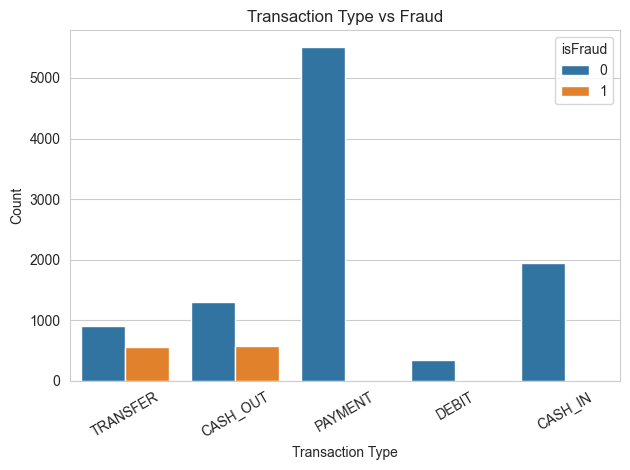

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple countplot for 'type' vs 'isFraud'
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("Transaction Type vs Fraud")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()

# Save and show
plt.savefig("images/transaction_type_vs_fraud.png", dpi=300)
plt.show()
plt.close()

Observation:- Fraudulent transactions occur exclusively in "TRANSFER" and "CASH_OUT" types, making the 'type' column a potential leakage feature and a candidate for removal.

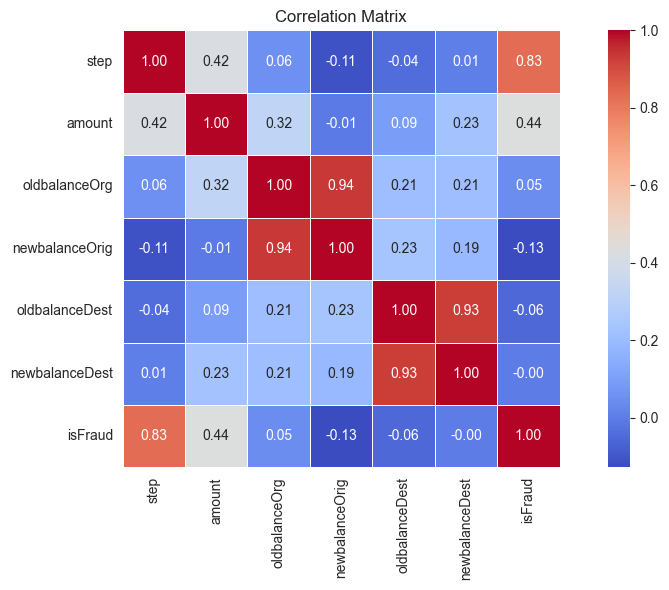

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical columns
corr = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()

# Save and show the plot
plt.savefig("images/correlation_matrix.png", dpi=300)
plt.show()
plt.close()

**Observation:-** We observe a high correlation of 0.83 between the step column and isFraud, indicating a strong relationship. To better understand this pattern, we’ll visualize the distribution of fraud across different time steps.

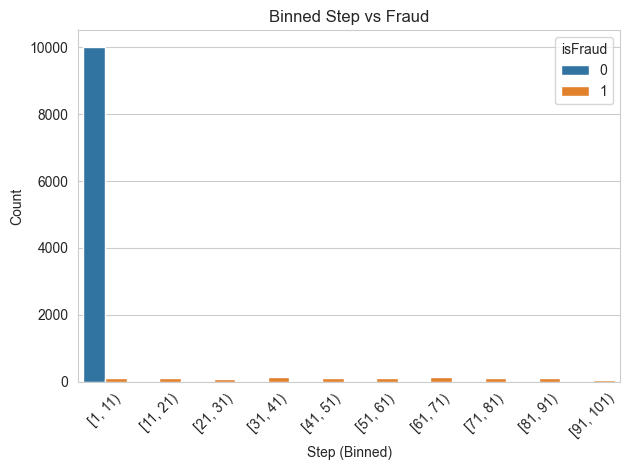

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define integer bin edges from min to max of step
min_step = df['step'].min()
max_step = df['step'].max()

# For example, create bins every 10 steps rounded to int
bin_width = 10
bins = np.arange(min_step, max_step + bin_width, bin_width)

# Create bins with these integer edges
df['step_bin'] = pd.cut(df['step'], bins=bins, right=False, include_lowest=True)

# Plot countplot
sns.countplot(data=df, x='step_bin', hue='isFraud')
plt.title("Binned Step vs Fraud")
plt.xlabel("Step (Binned)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show
plt.savefig("images/step_bin_vs_fraud.png", dpi=300)
plt.show()
plt.close()

**Observation:-** From the graph, we can see that all non-fraudulent transactions occur in steps below 11, while fraudulent transactions mainly happen at step 11 and above. This imbalance might cause the model to wrongly learn that any transaction occurring after step 11 is fraudulent by default.